# Walmart's Sales Forecasting

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import timedelta
from mpl_toolkits import mplot3d
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_features = pd.read_csv('features.csv.zip')
df_train = pd.read_csv('train.csv.zip')
df_test = pd.read_csv('test.csv.zip')
df_stores = pd.read_csv('stores.csv')
df_sample_submission = pd.read_csv('sampleSubmission.csv.zip')

### Overview of the imported Data

In [3]:
print(f"Shape of features.csv: {df_features.info()}\n")
df_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
Shape of features.csv: None



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [5]:
print(f"Shape of train.csv: {df_train.info()}\n")
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
Shape of train.csv: None



,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
df_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [7]:
print(f"Shape of test.csv: {df_test.info()}\n")
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
Shape of test.csv: None



,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
df_test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [9]:
print(f"Shape of stores.csv: {df_stores.info()}\n")
df_stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
Shape of stores.csv: None



,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
df_stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


## Data processing and cleaning

In [11]:
df_train_final = df_train.merge(df_stores,
                                how='inner', 
                                on='Store')\
                         .merge(df_features, 
                                how='inner', 
                                on=['Store', 'Date', 'IsHoliday'])

In [12]:
print(f"Shape of df_train_final.csv: {df_train_final.info()}")
df_train_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
Shape of df_train_final.

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [13]:
df_train_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [14]:
df_test_final = df_test.merge(df_stores,
                              how='inner',
                              on='Store')\
                       .merge(df_features,
                              how='inner',
                              on=['Store', 'Date', 'IsHoliday'])

In [15]:
print(f"Shape of df_test_final.csv: {df_test_final.info()}\n")
df_test_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB
Shape of df_test_final.csv: None



,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [16]:
df_test_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,115064.0,22.238207,12.809930,1.000000,11.000000,22.000000,33.000000,45.000000
Dept,115064.0,44.339524,30.656410,1.000000,18.000000,37.000000,74.000000,99.000000
Size,115064.0,136497.688921,61106.926438,34875.000000,93638.000000,140167.000000,202505.000000,219622.000000
Temperature,115064.0,53.941804,18.724153,-7.290000,39.820000,54.470000,67.350000,101.950000
Fuel_Price,115064.0,3.581546,0.239442,2.872000,3.431000,3.606000,3.766000,4.125000
MarkDown1,114915.0,7689.216439,10698.760716,-2781.450000,1966.460000,4842.290000,9439.140000,103184.980000
MarkDown2,86437.0,3734.051729,8323.495014,-35.740000,180.350000,742.590000,2735.670000,71074.170000
MarkDown3,105235.0,2403.088666,13767.939313,-179.260000,15.100000,78.260000,272.580000,149483.310000
MarkDown4,102176.0,3356.219071,7570.501545,0.220000,155.460000,840.940000,3096.920000,65344.640000
MarkDown5,115064.0,3922.681189,19445.150745,-185.170000,1309.300000,2390.430000,4227.270000,771448.100000


In [17]:
df_train_final.Date = pd.to_datetime(df_train_final.Date)
df_test_final.Date = pd.to_datetime(df_test_final.Date)

Above, the variable 'Date' was transformed from object to datetime type accepted by pandas library.

In [18]:
storetype_values = {'A':3, 'B':2, 'C':1}
df_train_final['Type'] = df_train_final.Type.map(storetype_values)
df_test_final['Type'] = df_test_final.Type.map(storetype_values)

Above the categorical variable 'Type' has been transformed into a numeric variable. Where, Type: A, B, C ----> Type: 3, 2, 1

### Elaboration of four new columns from the 'Date' field: Year, Month,Week and Day

In [19]:
df_train_final['Year']=df_train_final['Date'].dt.year
df_train_final['Month']=df_train_final['Date'].dt.month
df_train_final['Week']=df_train_final['Date'].dt.week
df_train_final['Day']=df_train_final['Date'].dt.day

df_test_final['Year']=df_test_final['Date'].dt.year
df_test_final['Month']=df_test_final['Date'].dt.month
df_test_final['Week']=df_test_final['Date'].dt.week
df_test_final['Day']=df_test_final['Date'].dt.day

In [20]:
#checking if the above action was done correctly
df_train_final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,3,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,2,2010-02-05,50605.27,False,3,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
2,1,3,2010-02-05,13740.12,False,3,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
3,1,4,2010-02-05,39954.04,False,3,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
4,1,5,2010-02-05,32229.38,False,3,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5


In [21]:
df_test_final.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,1,2012-11-02,False,3,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,44,2
1,1,2,2012-11-02,False,3,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,44,2
2,1,3,2012-11-02,False,3,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,44,2
3,1,4,2012-11-02,False,3,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,44,2
4,1,5,2012-11-02,False,3,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,44,2


### Checking for missing values

In [22]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [23]:
df_train_final.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

There are missing values ​​in the 'MarkDown [1-5]' fields. These are expressive values ​​in relation to the total amount of each one of them. Therefore, these missing values ​​will be imputed as 0.

In [24]:
df_train_final.loc[df_train_final.MarkDown1.isnull() ,'MarkDown1']= 0
df_train_final.loc[df_train_final.MarkDown2.isnull() ,'MarkDown2']= 0
df_train_final.loc[df_train_final.MarkDown3.isnull() ,'MarkDown3']= 0
df_train_final.loc[df_train_final.MarkDown4.isnull() ,'MarkDown4']= 0
df_train_final.loc[df_train_final.MarkDown5.isnull() ,'MarkDown5']= 0

In [25]:
df_train_final.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
Day             0
dtype: int64

In [26]:
df_train_final.isnull().values.any()

False

### Checking the negative values

In [27]:
df_train_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Type,421570.0,2.410088,0.666337,1.000,2.000000,3.00000,3.000000,3.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000


The Weekly_Sales,Temperature, MarkDown2, MarkDown3 fields have negative values ​​in the 'min' column. Of these, the only one that doesn't make sense to have a negative minimum value is Weekly_Sales, Since there's no way to have negative weekly sales, only positive or zero sales.

In [28]:
df_train_final[df_train_final.Weekly_Sales<0].shape

(1285, 20)

We have 1285 negative values ​​in this field

In [29]:
df_train_final['Weekly_Sales'].shape

(421570,)

The percentage of negative values ​​is very small compared to the whole. Therefore, the removal of these values ​​will have little impact on the modeling.

In [30]:
df_train_final = df_train_final[df_train_final.Weekly_Sales >= 0]

In [31]:
df_train_final[df_train_final.Weekly_Sales<0].shape

(0, 20)

Negative values ​​from the Weekly_Sales field have been removed.

### Checking for duplicate lines.

In [32]:
df_train_final.duplicated().sum()

0

There are no duplicate lines.

## Exploratory data analysis

### a) Impact of sales over the months

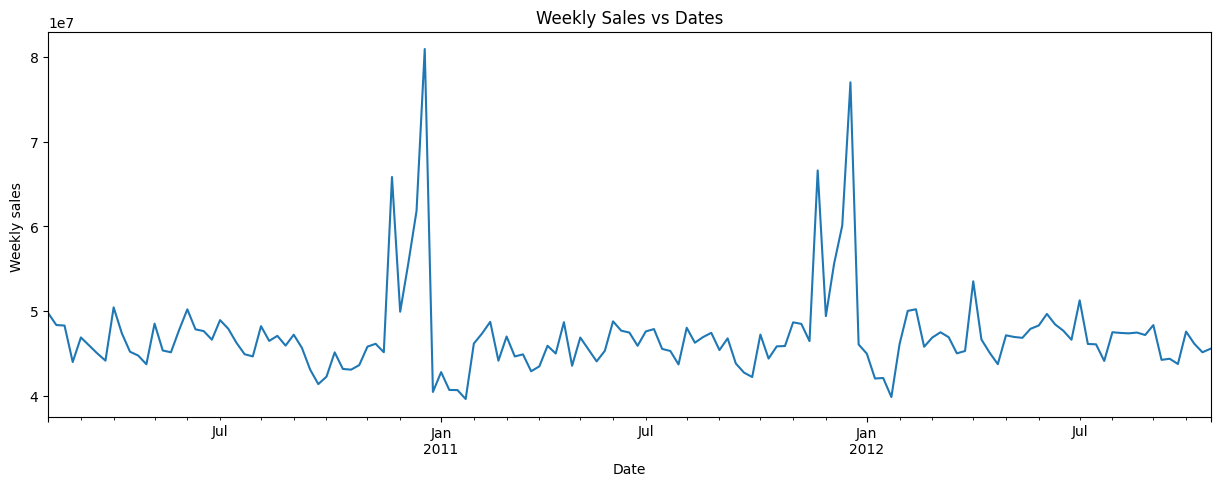

In [33]:
plt.figure(figsize=(15,5))
df_train_final.groupby(['Date'])['Weekly_Sales'].sum().plot()
plt.title('Weekly Sales vs Dates')
plt.ylabel('Weekly sales ');

##### Infernces:
1. Analyzing the graph, we see four peaks, generating high impacts on sales. Two of them are at the end of November (Thanksgiving holiday) and the other two are in the month of December (Christmas). The super bowl holiday (February) and Labor Day have an average impact on sales growth.
2. There is a slight drop in sales in December 2011 compared to the same month in 2012.
3. There is a seasonality in the weekly sales chart over time period that can be easily seen by the chart.
4. Average weekly sales are floating around 4.8*10^7

### b) Impact of sales over the weeks of the year.

<Figure size 1000x1000 with 0 Axes>

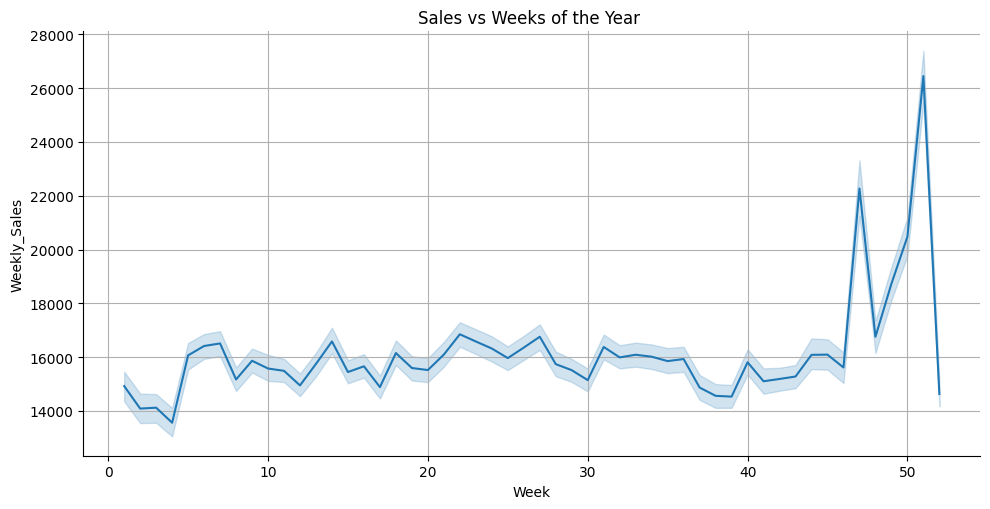

In [34]:
plt.figure(figsize=(10,10))
sns.relplot(x = 'Week',y = 'Weekly_Sales',data = df_train_final, kind='line',aspect = 2)
plt.title("Sales vs Weeks of the Year ")
plt.grid()
plt.show();

##### Inferences:
There are slight fluctuations of weeks throughout the year. From week 45 to 50 we have two sales peaks due to the Christmas and Thanksgiving holidays that happen during those weeks.

### c) Impact of markdowns[1-5] on weekly sales

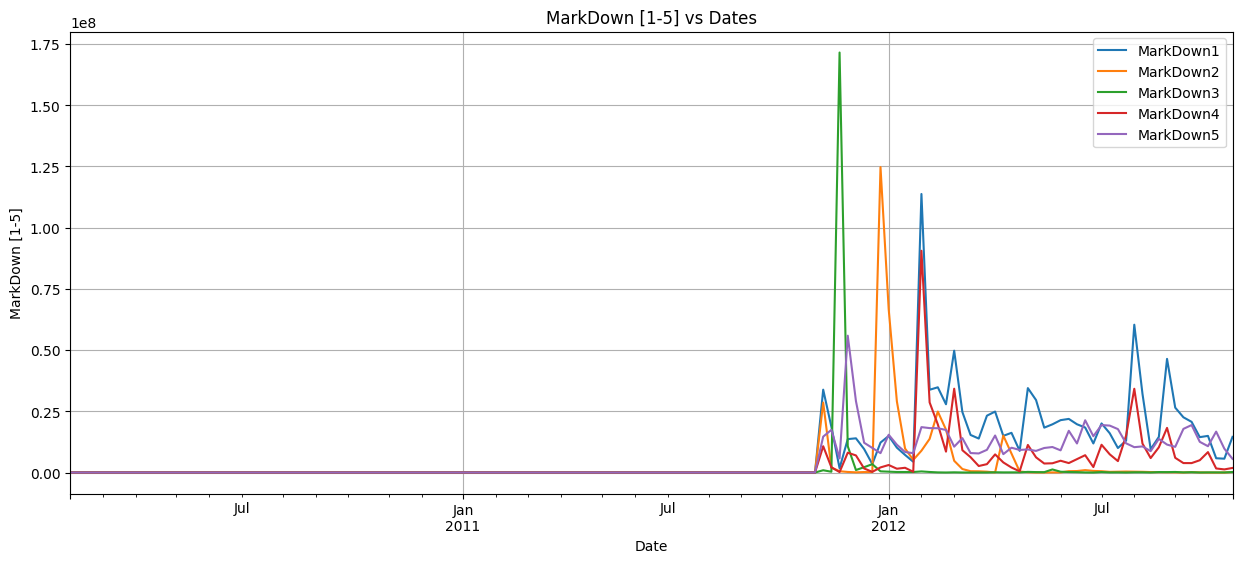

In [35]:
plt.figure(figsize=(15,6));
df_train_final.groupby(['Date'])['MarkDown1'].sum().plot(label='MarkDown1')
df_train_final.groupby(['Date'])['MarkDown2'].sum().plot(label='MarkDown2')
df_train_final.groupby(['Date'])['MarkDown3'].sum().plot(label='MarkDown3')
df_train_final.groupby(['Date'])['MarkDown4'].sum().plot(label='MarkDown4')
df_train_final.groupby(['Date'])['MarkDown5'].sum().plot(label='MarkDown5')

plt.grid()
plt.title('MarkDown [1-5] vs Dates')  
plt.ylabel('MarkDown [1-5]')
plt.legend();

##### Inferences:
1. There are no 'markdowns' values ​​available for dates prior to October 2011.
2. We had peaks of 'markdowns' in the range from November 2011 to February 2012. This range is where the following holidays occur: Christmas, Thanksgiving and the Super Bowl.
3. Order of impact of the peaks mentioned in item 2: markdowns3 > markdowns2 > markdowns1 > markdowns4 > markdowns5

### d) Impact on sales with/without holidays during the week

In [36]:
df_train_final.shape

(420285, 20)

In [37]:
print("Holiday vs Weekly_Sales :\n")
print(df_train_final[df_train_final['IsHoliday']==True]['Weekly_Sales'].describe())
print('\n')
print("Non-Holiday vs Weekly_Sales:\n")
print(df_train_final[df_train_final['IsHoliday']==False]['Weekly_Sales'].describe())

Holiday vs Weekly_Sales :

count     29563.000000
mean      17092.566220
std       27249.206776
min           0.000000
25%        2122.830000
50%        7997.860000
75%       21256.915000
max      693099.360000
Name: Weekly_Sales, dtype: float64


Non-Holiday vs Weekly_Sales:

count    390722.000000
mean      15949.958317
std       22347.258698
min           0.000000
25%        2117.300000
50%        7636.080000
75%       20193.912500
max      406988.630000
Name: Weekly_Sales, dtype: float64


##### Inferences:
1. Sales averages when there is a holiday in the week: 17092,566
2. Sales averages when there is no holiday in the week: 15949,958

### e) Average sales by stores

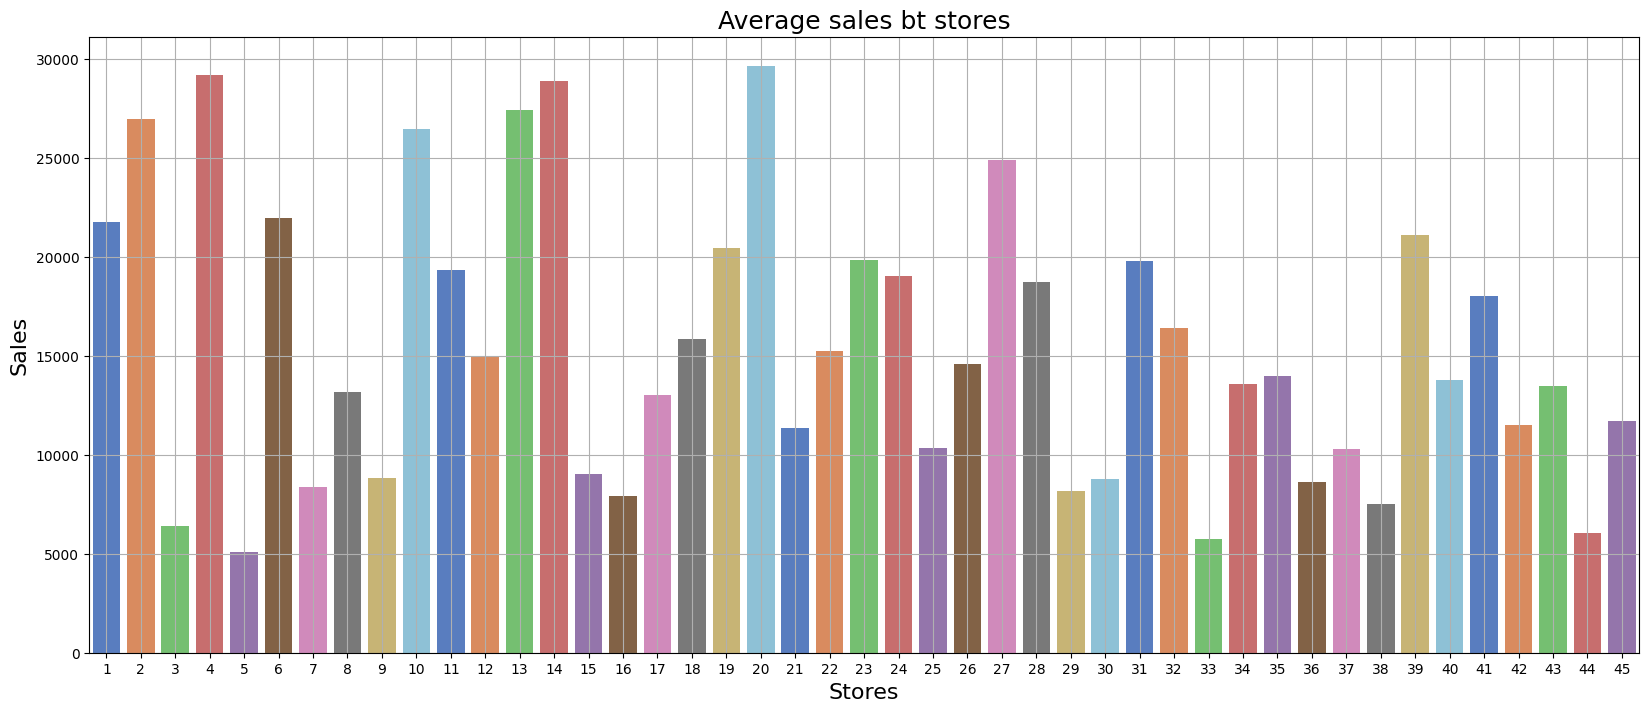

In [38]:
weekly_sales = df_train_final['Weekly_Sales'].groupby(df_train_final['Store']).mean()

plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='muted') 

plt.grid()
plt.title('Average sales bt stores', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Stores', fontsize=16)
plt.show()

##### Inferences
1. Number of stores that sell the most: 2,4,6,10,13,14,19,20,27 and 39.
2. Sales range of stores mentioned in '1': From 22 to 30 thousand sales

### f) Average sales by department

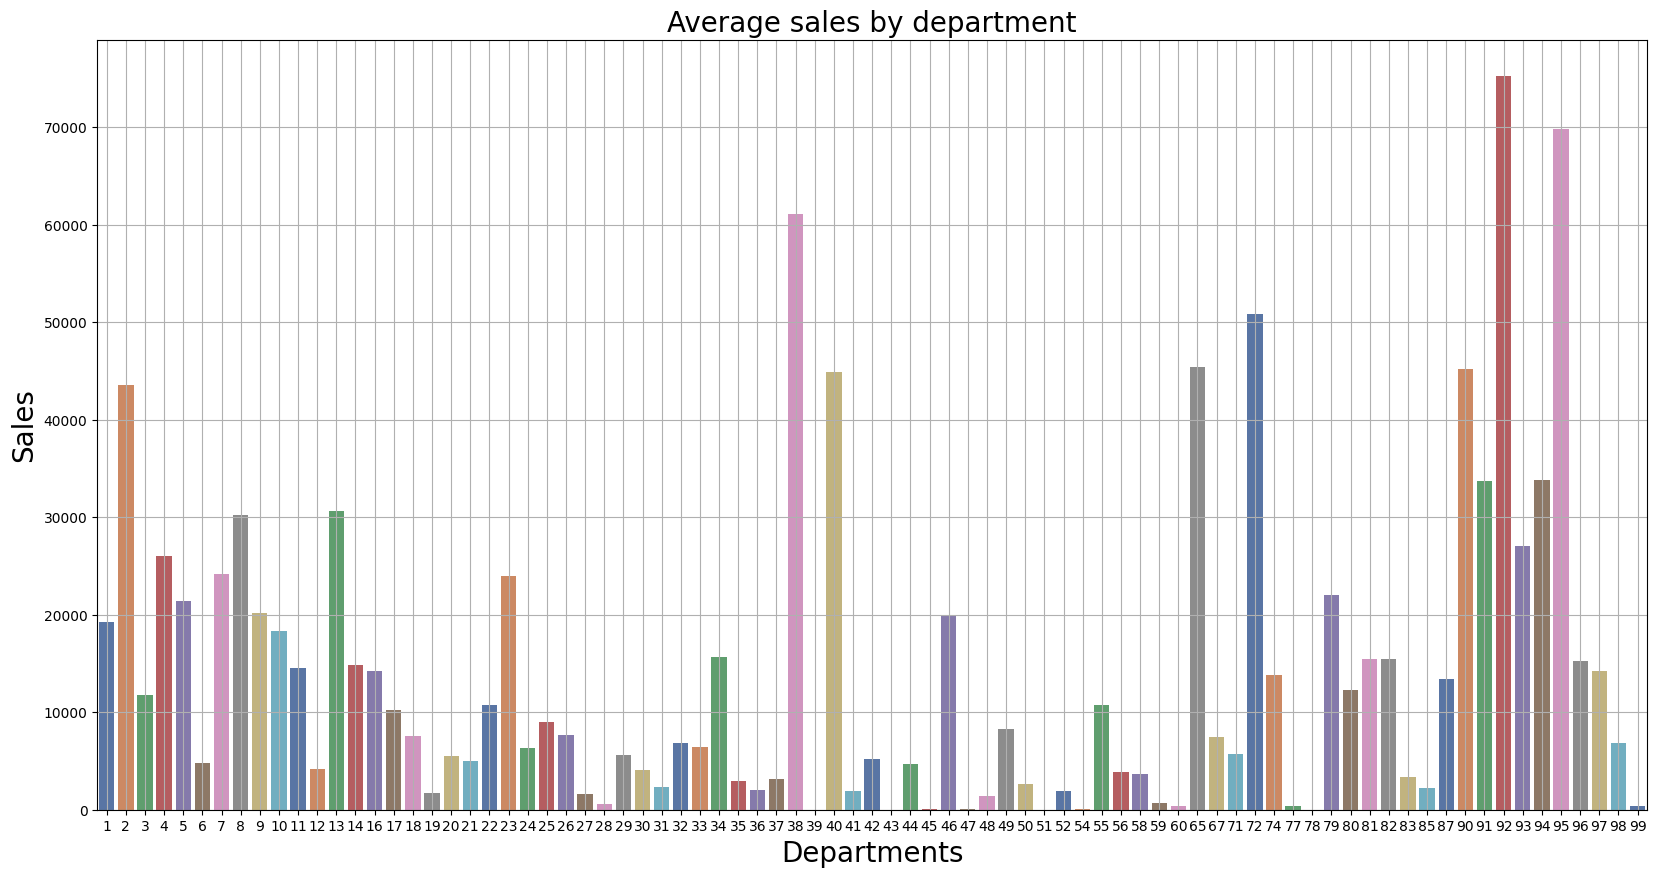

In [39]:
weekly_sales = df_train_final['Weekly_Sales'].groupby(df_train_final['Dept']).mean()
plt.figure(figsize=(20,10))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='deep')
plt.grid()
plt.title('Average sales by department', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xlabel('Departments', fontsize=20)
plt.show()

##### Inferences:
1. Number of departments that sell the most: 2,8,13,38,40,65,72,90,91,92,94,95
2. Sales range of the departments mentioned in '1': From 32 to 75 thousand sales
3. Departments that did not obtain sales according to the available data: 15,39,43,45,47,51,53,54,57,61,62,63,64,66,68,69,70,73,75,76, 78,84,86,88,89.

### g) Average sales by store size and type

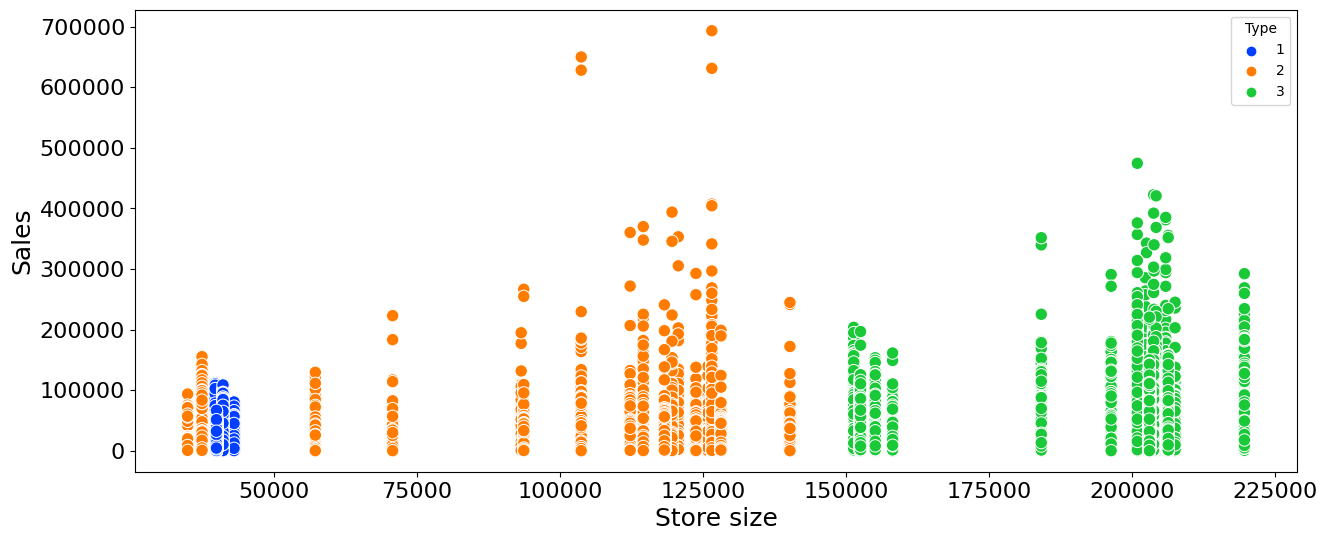

In [40]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df_train_final.Size, y=df_train_final.Weekly_Sales, hue=df_train_final.Type, s=80, palette='bright');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Store size', fontsize=18)
plt.ylabel('Sales', fontsize=18);

##### Inferences:
1. Type '3' store sales > Type '2' store sales > Type '1' store sales
2. Smaller stores, up to 45,000 [unit unspecified], sell between 100,000 to 180,000 [unit unspecified]
3. Medium-sized stores (80,000 to 44,000 [unit unspecified]) sell between 290,000 to 430,000 [unit unspecified]
4. Larger stores (over 175,000 [unit not specified])

## Random Forest Regressor Machine Learning Model

In [41]:
def WMAE(dataset, real, predicted):
  
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1) # Weight value. If w = 5 has a weekday holiday and w = 1 otherwise.
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [42]:
def random_forest(n_estimators, max_depth): 
    result = [] 
    for estimator in n_estimators:  
        for depth in max_depth:
            wmaes_cv = []       
            for i in range(1,5):
                print('k:', i, ', n_estimators:', estimator, ', max_depth:', depth) 
                x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
                RF = RandomForestRegressor(n_estimators=estimator, max_depth=depth)
                RF.fit(x_train, y_train) 
                predicted = RF.predict(x_test) 
                wmaes_cv.append(WMAE(x_test, y_test, predicted))
            print('WMAE:', np.mean(wmaes_cv)) 
            result.append({'Max_Depth': depth, 'Estimators': estimator, 'WMAE': np.mean(wmaes_cv)}) 
    return pd.DataFrame(result) 

In [43]:
X_train = df_train_final[['Store','Dept','IsHoliday','Size','Week','Type','Year']]
Y_train = df_train_final['Weekly_Sales'] 

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Store      420285 non-null  int64
 1   Dept       420285 non-null  int64
 2   IsHoliday  420285 non-null  bool 
 3   Size       420285 non-null  int64
 4   Week       420285 non-null  int64
 5   Type       420285 non-null  int64
 6   Year       420285 non-null  int64
dtypes: bool(1), int64(6)
memory usage: 39.0 MB


In [45]:
n_estimators = [56, 58, 60] 
max_depth = [25, 27, 30] 

In [46]:
RF = RandomForestRegressor(n_estimators=56, max_depth=25)
RF.fit(X_train, Y_train)

RandomForestRegressor(max_depth=25, n_estimators=56)

In [47]:
X_test = df_test_final[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
predict = RF.predict(X_test)

In [48]:
df_sample_submission['Weekly_Sales'] = predict

In [49]:
df_sample_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,30618.751071
1,1_1_2012-11-09,46251.371250
2,1_1_2012-11-16,9441.528367
3,1_1_2012-11-23,36661.722500
4,1_1_2012-11-30,27155.403036
...,...,...
115059,45_98_2013-06-28,3378.451429
115060,45_98_2013-07-05,3918.739464
115061,45_98_2013-07-12,52576.636786
115062,45_98_2013-07-19,6271.568750


In [50]:
df_sample_submission.to_csv('submission.csv', index=False)